# Course 5: Ensemble Learning

## Project: Building Basic predictive models over the NYC Taxi Trip dataset.


### Load libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from haversine import haversine
import statsmodels.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings; warnings.simplefilter('ignore')
import warnings
warnings.filterwarnings('ignore')

### Import dataset

In [2]:
data=pd.read_csv("Project.csv")

### Data Exploration

In [3]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


### Feature details:

- id - a unique identifier for each trip
- vendor_id - a code indicating the provider associated with the trip record
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

### Label details:

- trip_duration - duration of the trip in seconds

In [4]:
data.shape

(729322, 11)

In [5]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### Result:
####  There are no null values in the dataset 

In [6]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [7]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

### calculate and assign new columns with week_day, month, pickup hour

In [8]:
data['weekday'] = data.pickup_datetime.dt.day_name()
data['month'] = data.pickup_datetime.dt.month
data['weekday_num'] = data.pickup_datetime.dt.weekday
data['pick_up_hour'] = data.pickup_datetime.dt.hour 

In [9]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,weekday_num,pick_up_hour
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,2,0,16
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,3,4,23
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,2,6,17
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,1,1,9
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,2,2,6


In [10]:
from haversine import haversine

### calculate distance between pickup and dropoff coordinates using haversine formula

In [11]:
def calc_distance(data):
    pickup = (data['pickup_latitude'], data['pickup_longitude'])
    drop = (data['dropoff_latitude'], data['dropoff_longitude'])
    return haversine(pickup, drop)

### calculate distance and assign new column to dataframe

In [12]:
data['Distance'] = data.apply(lambda x: calc_distance(x), axis = 1)

### calculate speed in km/hr

In [13]:
data['speed'] = (data.Distance/(data.trip_duration/3600))

In [14]:
data.dtypes.reset_index()

,index,0
0,id,object
1,vendor_id,int64
2,pickup_datetime,datetime64[ns]
3,dropoff_datetime,datetime64[ns]
4,passenger_count,int64
5,pickup_longitude,float64
6,pickup_latitude,float64
7,dropoff_longitude,float64
8,dropoff_latitude,float64
9,store_and_fwd_flag,object


### Dummify all the categorical features like "store_and_fwd_flag, vendor_id, month, weekday_num, pickup_hour, passenger_count"


In [15]:
dummy = pd.get_dummies(data.store_and_fwd_flag, prefix='flag')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
data = pd.concat([data,dummy], axis = 1)

dummy = pd.get_dummies(data.vendor_id, prefix='vendor_id')
dummy.drop(dummy.columns[0], axis=1, inplace=True) 
data = pd.concat([data,dummy], axis = 1)

dummy = pd.get_dummies(data.month, prefix='month')
dummy.drop(dummy.columns[0], axis=1, inplace=True) 
data = pd.concat([data,dummy], axis = 1)

dummy = pd.get_dummies(data.weekday_num, prefix='weekday_num')
dummy.drop(dummy.columns[0], axis=1, inplace=True) 
data = pd.concat([data,dummy], axis = 1)

dummy = pd.get_dummies(data.pick_up_hour, prefix='pickup_hour')
dummy.drop(dummy.columns[0], axis=1, inplace=True) 
data = pd.concat([data,dummy], axis = 1)

dummy = pd.get_dummies(data.passenger_count, prefix='passenger_count')
dummy.drop(dummy.columns[0], axis=1, inplace=True) 
data = pd.concat([data,dummy], axis = 1)


In [16]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour_22,pickup_hour_23,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_9
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,0,0,1,0,0,0,0,0,0,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,0,1,0,1,0,0,0,0,0,0
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,0,0,0,1,0,0,0,0,0,0
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,0,0,0,0,0,0,0,1,0,0
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,0,0,1,0,0,0,0,0,0,0


In [17]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'weekday', 'month', 'weekday_num', 'pick_up_hour',
       'Distance', 'speed', 'flag_Y', 'vendor_id_2', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'weekday_num_1', 'weekday_num_2',
       'weekday_num_3', 'weekday_num_4', 'weekday_num_5', 'weekday_num_6',
       'pickup_hour_1', 'pickup_hour_2', 'pickup_hour_3', 'pickup_hour_4',
       'pickup_hour_5', 'pickup_hour_6', 'pickup_hour_7', 'pickup_hour_8',
       'pickup_hour_9', 'pickup_hour_10', 'pickup_hour_11', 'pickup_hour_12',
       'pickup_hour_13', 'pickup_hour_14', 'pickup_hour_15', 'pickup_hour_16',
       'pickup_hour_17', 'pickup_hour_18', 'pickup_hour_19', 'pickup_hour_20',
       'pickup_hour_21', 'pickup_hour_22', 'pickup_hour_23',
       'passenger_count_1', 'passenger_count_2', 'pass

### Univariate analysis

### Passenger count

### New York City Taxi Passenger Limit says:

- A maximum of 4 passengers can ride in traditional cabs, there are also 5 passenger cabs that look more like minivans.
- A child under 7 is allowed to sit on a passenger's lap in the rear seat in addition to the passenger limit.

#### So, in total we can assume that maximum 6 passenger can board the new york taxi i.e. 5 adult + 1 minor

In [18]:
data.passenger_count.value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

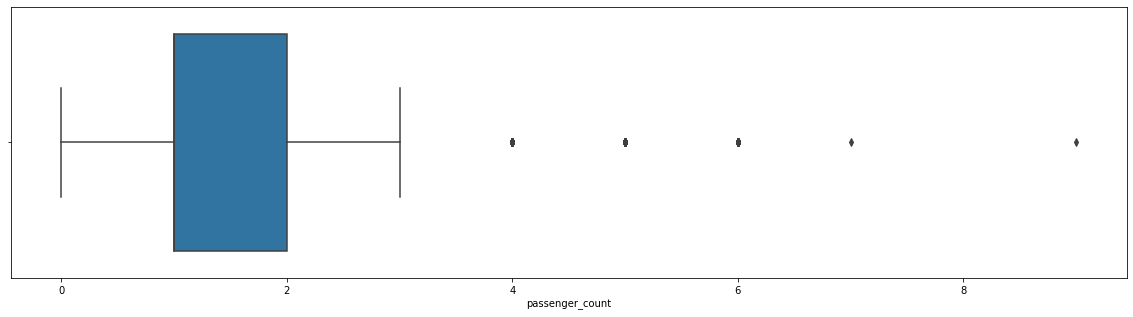

In [19]:
plt.figure(figsize = (20,5))
sns.boxplot(data.passenger_count)
plt.show()

### Observation
- Most of the trips are either 1 or 2
- There are 0 passenger count
- Few trips consisted of even 7, 8 or 9 passengers. Clear outliers and pointers to data inconsistency

### Idea:
Passenger count is a driver entered value. Since the trip is not possible without passengers. So the driver forgot to enter the value for the trips with 0 passenger count. Lets analyze the passenger count distribution further to make it consistent for further analysis



In [20]:
data['passenger_count'].describe()

count    729322.000000
mean          1.662055
std           1.312446
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: passenger_count, dtype: float64

##### As per above details. Mean median and mode are all approx equal to 1. So we would replace the 0 passenger count with 1.

In [21]:
data['passenger_count'] = data.passenger_count.map(lambda x: 1 if x == 0 else x)

#### Also, we will remove the records with passenger count > 7, 8 or 9 as they are extreme values and looks very odd to be ocupied in a taxi.

In [22]:
data = data[data.passenger_count <= 6]

In [23]:
data.passenger_count.value_counts()

1    517448
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

### Data is consistent. 

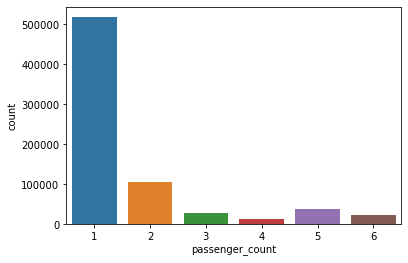

In [24]:
sns.countplot(data.passenger_count)
plt.show()

### Observation
- Most of the trips was taken by single passenger and that is inline with our day to day observations

### Vendor

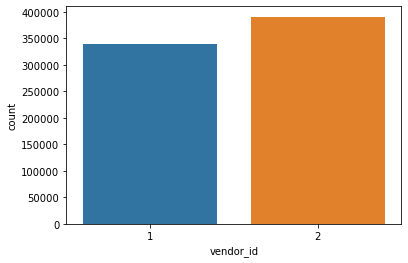

In [25]:
sns.countplot(data.vendor_id)
plt.show()

### Observation
- Vendor 2 is evidently more famous among the population as per the above graph. It has more number of trips as compared to vendor 1
- Vendor 2 has greater market share than vendor 1

### Distance

#### Distribution of distance at different rides

In [26]:
data['Distance'].describe()

count    729320.000000
mean          3.441153
std           4.353140
min           0.000000
25%           1.232700
50%           2.095678
75%           3.876491
max        1240.910391
Name: Distance, dtype: float64

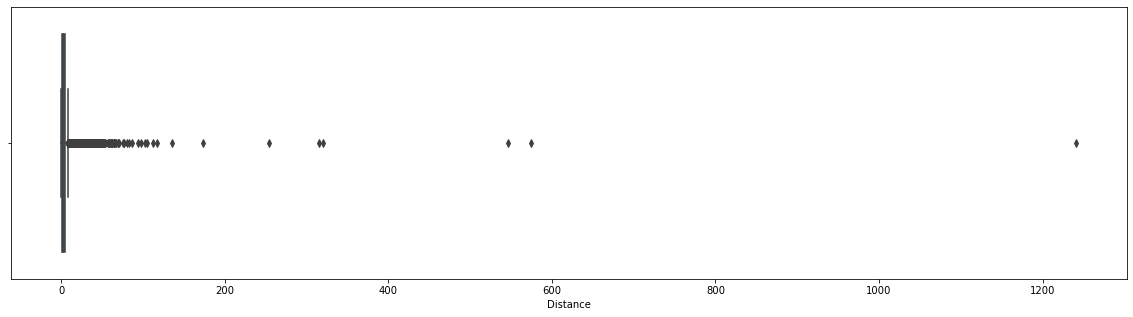

In [27]:
plt.figure(figsize = (20,5))
sns.boxplot(data.Distance)
plt.show()

### Findings
- There are trips where more than 100km distance
- Some of the trips whosee distance value is 0km

### Observations
- mean distance travelled is approx 3.5 kms.
- standard deviation of 4.3 which shows that most of the trips are limited to the range of 1-10 kms.

In [28]:
print("There are {} trip records with 0 km distance".format(data.Distance[data.Distance == 0 ].count()))

There are 2900 trip records with 0 km distance


In [29]:
data[data.Distance==0].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour_22,pickup_hour_23,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_9
263,id3155891,2,2016-06-28 11:21:00,2016-06-28 11:25:00,2,-73.996422,40.298828,-73.996422,40.298828,N,...,0,0,0,1,0,0,0,0,0,0
327,id0786923,2,2016-03-26 13:34:38,2016-03-26 13:37:17,1,-73.996323,40.753460,-73.996323,40.753460,N,...,0,0,1,0,0,0,0,0,0,0
795,id2323213,2,2016-06-13 16:49:52,2016-06-13 17:04:49,5,-73.967171,40.763500,-73.967171,40.763500,N,...,0,0,0,0,0,0,1,0,0,0
1176,id3235868,1,2016-02-29 21:39:52,2016-02-29 21:44:08,1,-73.995232,40.744038,-73.995232,40.744038,N,...,0,0,1,0,0,0,0,0,0,0
1257,id1865738,2,2016-03-13 11:38:36,2016-03-13 12:00:46,2,-73.912781,40.804428,-73.912781,40.804428,N,...,0,0,0,1,0,0,0,0,0,0


### Observation
#### Around 3K trip record with distance equal to 0. Below are some possible explanation for such records.

1) Customer changed mind and cancelled the journey just after accepting it.

2) Software didn't recorded dropoff location properly due to which dropoff location is the same as the pickup location.

3) Issue with GPS tracker while the journey is being finished.

4) Driver cancelled the trip just after accepting it due to some reason. So the trip couldn't start

5) Or some other issue with the software itself which a technical guy can explain

There is some serious inconsistencies in the data where drop off location is same as the pickup location. Imputing the distance values is not possible by considering a correlation with the duration, then the dropoff_location coordinates would not be inline with the distance otherwise.

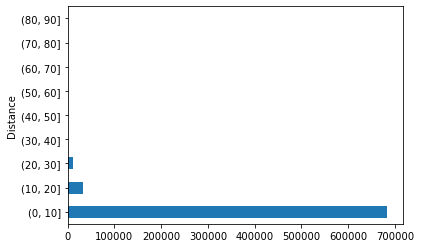

In [30]:
data.Distance.groupby(pd.cut(data.Distance, np.arange(0,100,10))).count().plot(kind='barh')
plt.show()

### Observation
- Most of the rides are completed between 1-10 Kms with some of the rides with distances between 10-30 kms. 
- Other slabs bar are not visible because the number of trips are very less as compared to these slabs

### Trip Duration

In [31]:
data.trip_duration.describe()

count    7.293200e+05
mean     9.522310e+02
std      3.864631e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.630000e+02
75%      1.075000e+03
max      1.939736e+06
Name: trip_duration, dtype: float64

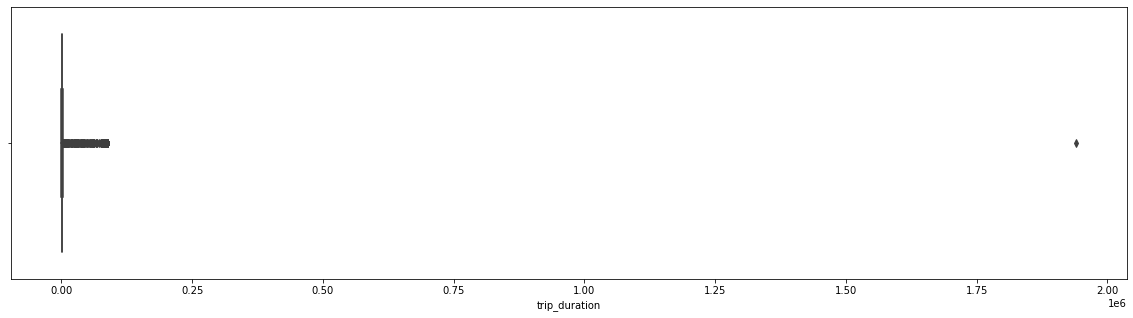

In [32]:
plt.figure(figsize = (20,5))
sns.boxplot(data.trip_duration)
plt.show()

### Observation

- Most of the trips are from 400 seconds to 1075 seconds
- There are outliers which are to be removed.
- Mean and median are not same and mean is greater than median which means the data is right-skewed.
- There are some durations with as low as 1 second. which points towards trips with 0 km distance.

In [33]:
data.trip_duration.groupby(pd.cut(data.trip_duration, np.arange(1,max(data.trip_duration),3600))).count()

trip_duration
(1, 3601]             723251
(3601, 7201]            4964
(7201, 10801]             61
(10801, 14401]            15
(14401, 18001]             2
                       ...  
(1918801, 1922401]         0
(1922401, 1926001]         0
(1926001, 1929601]         0
(1929601, 1933201]         0
(1933201, 1936801]         0
Name: trip_duration, Length: 538, dtype: int64

### Observation
- Most of the trips occurs within 1 hour with some good numbers of trips duration going above 1 hour.
- There are trips with ore than 24 hours of travel duration i.e. 86400 seconds which might have occured for the outstation travels.  

In [34]:
data[data.trip_duration > 86400]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour_22,pickup_hour_23,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_9
21813,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.78965,40.643559,-73.95681,40.773087,N,...,0,0,1,0,0,0,0,0,0,0


### Observation
- One trip ran for more than 20 days.
- This trip is taken by vendor 1 which they might allow longer trip
- The trip taken on Tuesday in the first month with the distance of 20kms.

#### They fail for correct predictions and they bring inconsistency in the algorithm

In [35]:
data = data[data.trip_duration <= 86400]

####  Visualizing the number of trips taken in slabs of 0-10, 20-30 ... minutes respectively


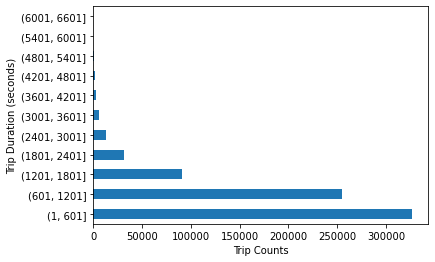

In [36]:
data.trip_duration.groupby(pd.cut(data.trip_duration, np.arange(1,7200,600))).count().plot(kind='barh')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (seconds)')
plt.show()

### Obseravtion
- Most of the trips took 0 - 30 mins to complete

### Speed
#### Speed is a function of distance and time. Let's visualize speed in different trips.

Maximum speed limit in NYC is as follows:

25 mph in urban area i.e. 40 km/hr

65 mph on controlled state highways i.e. approx 104 km/hr

In [37]:
data['speed'].describe()

count    729319.000000
mean         14.421527
std          12.341036
min           0.000000
25%           9.124341
50%          12.796887
75%          17.844052
max        5640.501776
Name: speed, dtype: float64

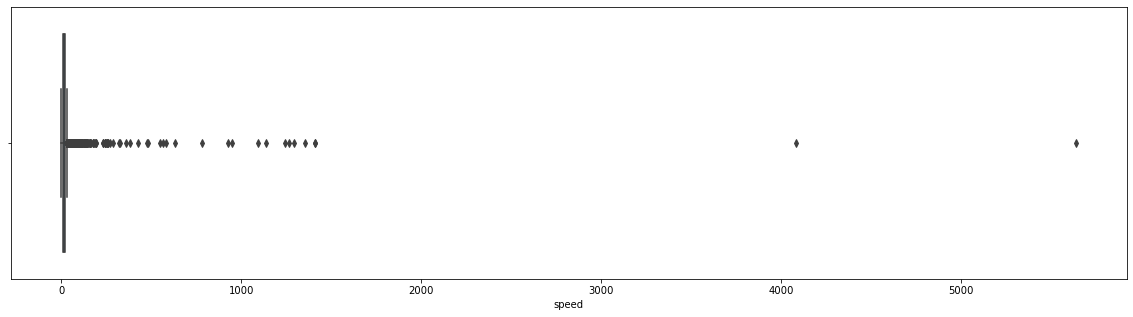

In [38]:
plt.figure(figsize = (20,5))
sns.boxplot(data.speed)
plt.show()

### Observations
- Most of the trips are above 104km/hr. These are the outliers
- The maximun speed is 104km/hr on controlles state highways

#### Removing the speed which are greater than 104km/hr


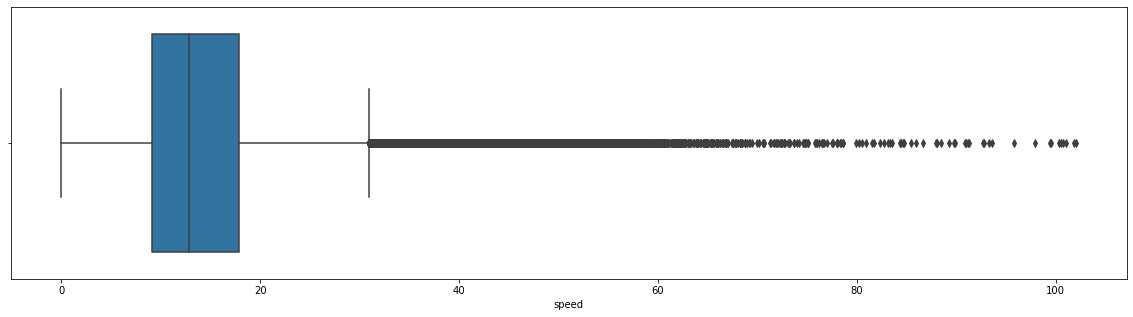

In [39]:
data = data[data.speed <= 104]
plt.figure(figsize = (20,5))
sns.boxplot(data.speed)
plt.show()

### Observations
- Trips over 30 km/hr are being considered as outliers but we cannot ignore them because they are well under the highest speed limit of 104 km/h on state controlled highways.
- Mostly trips are done at a speed range of 10-20 km/hr with an average speed of around 14 km/hr.

### speed range ditribution


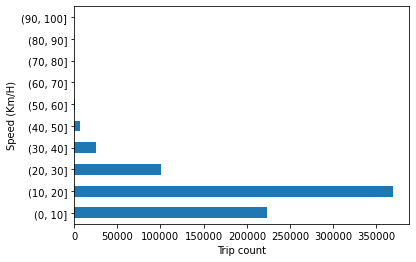

In [40]:
data.speed.groupby(pd.cut(data.speed, np.arange(0,104,10))).count().plot(kind = 'barh')
plt.xlabel('Trip count')
plt.ylabel('Speed (Km/H)')
plt.show()

### Observation
It has been proved from this graph that most of the trips were done at a speed range of 10-20 km/hr.

### Store_and_fwd_flag
#### This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

In [41]:
data.flag_Y.value_counts(normalize=True)

0    0.994461
1    0.005539
Name: flag_Y, dtype: float64

### Observations

- Above result shows that only about 0.5% of the trip details were stored in the vehicle first before sending it to the server. 

#### This might have occured because of the following reasons:
1) Outstation trips didn't had proper connection at the time when trip completes.

2) Temporary loss of signals while the trip was about to finish

3) Inconsistent signal reception over the trip duration.

4) The GPS or mobile device battery was down when the trip finished.

In [42]:
data.flag_Y.value_counts()

0    725200
1      4039
Name: flag_Y, dtype: int64

### Observation

- Around 4K trips had to store the flag and then report to the server when the connection was established.

#### Distribution for the vendors of the offline trip


In [43]:
data.vendor_id[data.flag_Y == 1].value_counts()

1    4039
Name: vendor_id, dtype: int64

### Observation

#### Above result shows that all the offline trips were taken by vendor 1. We already know that vendor 2 has greater market share as compared to vendor 1. So, there can be two reasons for this scenario.

1) Either vendor 1 utilizes advance technology than vendor 2 to store and forward trip details in case of temporary signal loss.

2) Or vendor 1 uses poor infrastructure which often suffers from the server connection instability due to which they have to store the trip info in the vehicle and send it to the server later when the server connection is back.


In [44]:
data[data.flag_Y == 1]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour_22,pickup_hour_23,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_9
378,id1347533,1,2016-05-27 18:09:01,2016-05-27 18:16:30,1,-73.976051,40.744671,-73.979721,40.722958,Y,...,0,0,1,0,0,0,0,0,0,0
400,id2733049,1,2016-03-02 20:05:12,2016-03-02 20:52:52,2,-73.978134,40.757484,-73.998955,40.614380,Y,...,0,0,0,1,0,0,0,0,0,0
501,id2484490,1,2016-01-21 08:07:13,2016-01-21 08:18:21,1,-73.999771,40.739487,-73.983940,40.761421,Y,...,0,0,1,0,0,0,0,0,0,0
644,id2090829,1,2016-01-11 12:10:13,2016-01-11 12:25:41,2,-74.013611,40.714310,-73.976601,40.751938,Y,...,0,0,0,1,0,0,0,0,0,0
1278,id0512889,1,2016-06-10 21:20:14,2016-06-10 21:26:51,1,-73.958183,40.766190,-73.956032,40.782814,Y,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728481,id0008273,1,2016-04-08 17:52:56,2016-04-08 18:35:36,1,-73.969627,40.760384,-73.862061,40.768559,Y,...,0,0,1,0,0,0,0,0,0,0
728607,id3254730,1,2016-06-03 01:21:11,2016-06-03 01:30:16,1,-74.004692,40.751846,-74.004860,40.735130,Y,...,0,0,1,0,0,0,0,0,0,0
729074,id1347803,1,2016-03-17 01:24:10,2016-03-17 01:35:25,1,-73.988808,40.723038,-73.997543,40.695587,Y,...,0,0,1,0,0,0,0,0,0,0
729119,id2265972,1,2016-01-07 07:51:18,2016-01-07 07:51:41,3,-73.782356,40.644211,-73.782364,40.644211,Y,...,0,0,0,0,1,0,0,0,0,0


### Observation

- Some trips are local some cover longer distance
- Almost each day is listed against offline trips.
- Offline trips were taken almost at all hours as per the search result.
- There is no month which appears to be more dominant in the results.
- Even the trip duration covers different scales.

#### So all in all there doesn't seems to be any relation with either of the metric for the offline 

### Total Trips per hour

#### Distribution of the pickups across the 24 hour time scale.


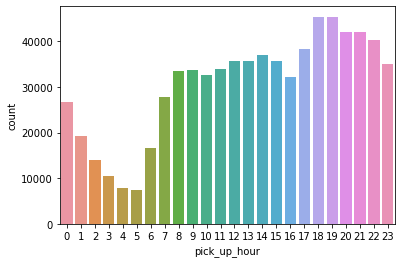

In [45]:
sns.countplot(data.pick_up_hour)
plt.show()

### Observation
-  Taxi pickups which starts increasing from 6AM in the morning and then declines from late evening i.e. around 7 PM. 



### Total trips per weekday


#### Distribution of taxi pickup across the week


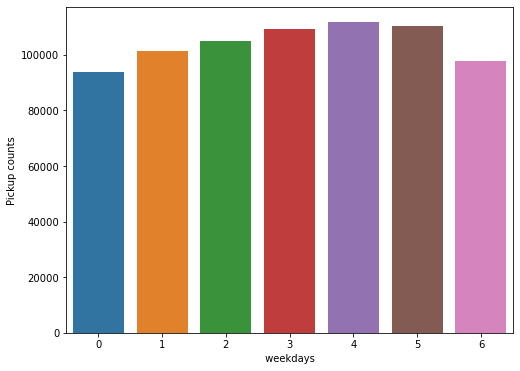

In [46]:
plt.figure(figsize = (8,6))
sns.countplot(data.weekday_num)
plt.xlabel(' weekdays ')
plt.ylabel('Pickup counts')
plt.show()

### Observation
- Increasing trend of taxi pickups starting from Monday till Friday. The trend starts declining from saturday till monday which is normal where some office going people likes to stay at home for rest on the weekends.

#### Hourwise pickup pattern across the week


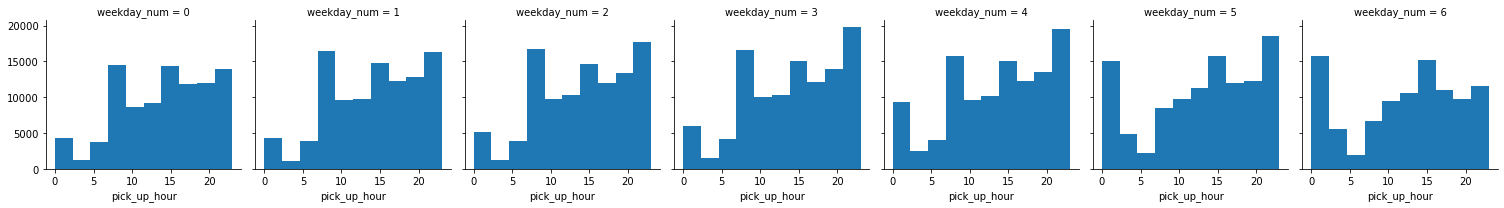

In [47]:
n = sns.FacetGrid(data, col='weekday_num')
n.map(plt.hist, 'pick_up_hour')
plt.show()

### Observation

- Taxi pickups increased in the late night hours over the weekend possibly due to more outstation rides or for the late night leisures nearby activities.

- Early morning pickups i.e before 5 AM have increased over the weekend in comparison to the office hours pickups i.e. after 7 AM which have decreased due to obvious reasons.

- Taxi pickups seems to be consistent across the week at 15 Hours i.e. at 3 PM.

### Total trips per month


#### Distribution of trip across the months


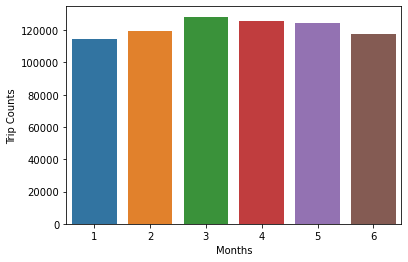

In [48]:
sns.countplot(data.month)
plt.ylabel('Trip Counts')
plt.xlabel('Months')
plt.show()

### Observation
- There is balance in the trip across months

### Bivariate Analysis


### Trip duration per hour

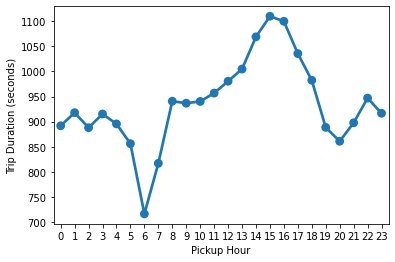

In [49]:
group1 = data.groupby('pick_up_hour').trip_duration.mean()
sns.pointplot(group1.index, group1.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Pickup Hour')
plt.show()

### Observation

- Average trip duration is lowest at 6 AM when there is minimal traffic on the roads.

- Average trip duration is generally highest around 3 PM during the busy streets.

- Trip duration on an average is similar during early morning hours i.e. before 6 AM & late evening hours i.e. after 6 PM.

### Trip duration per weekday

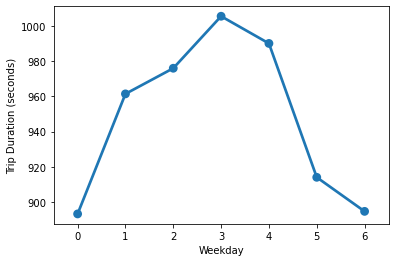

In [50]:
group2 = data.groupby('weekday_num').trip_duration.mean()
sns.pointplot(group2.index, group2.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Weekday')
plt.show()

### Observation
- Trip duration is almost equally distributed across the week on a scale of 0-1000 minutes with minimal difference in the duration times.

- Trip duration on thursday is longest among all days.

### Trip duration per month

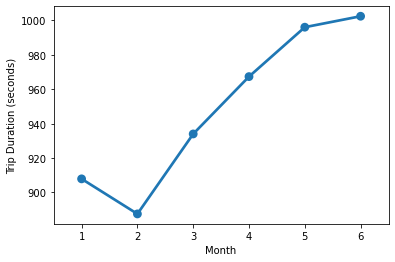

In [51]:
group3 = data.groupby('month').trip_duration.mean()
sns.pointplot(group3.index, group3.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Month')
plt.show()

### Observation
- Increasing trend in the average trip duration along with each subsequent month.

- The duration difference between each month is not much. It has increased gradually over a period of 6 months.

- It is lowest during february when winters starts declining.

- There might be some seasonal parameters like wind/rain which can be a factor of this gradual increase in trip duration over a period. Like May is generally the rainy season in NYC and which is inline with our visualization. As it generally takes longer on the roads due to traffic jams during rainy season. So natually the trip duration would increase towards April May and June.

### Trip Duration per vendor

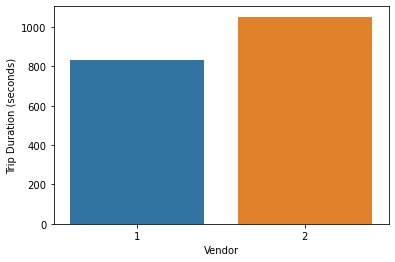

In [52]:
group4 = data.groupby('vendor_id').trip_duration.mean()
sns.barplot(group4.index, group4.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Vendor')
plt.show()

### Observation

- Average trip duration for vendor 2 is higher than vendor 1 by approx 200 seconds i.e. atleast 3 minutes per trip.

### Trip Duration Vs. flag

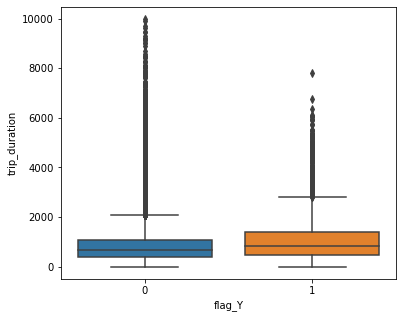

In [53]:
plt.figure(figsize = (6,5))
plot_dur = data.loc[(data.trip_duration < 10000)]
sns.boxplot(x = "flag_Y", y = "trip_duration", data = plot_dur)
plt.show()

### Observation
- Trip durations scale is less for the trips where the flag is set i.e. the trip details are stored before sending it to the server.
- Trip duration outliers are also less for the trips with flag 'Y' as compared the trips with flag 'N'.
- Trip duration is longer for the trips where the flag is not set.
- Inter quartile range of trip duration is more for the trips with the flag 'Y' as compared to the trips with flag 'N' but the median value is almost equal for both.

### Distance per hour

#### Trip distance must be more or less proportional to the trip duration if we ignore general traffic and other stuff on the road.

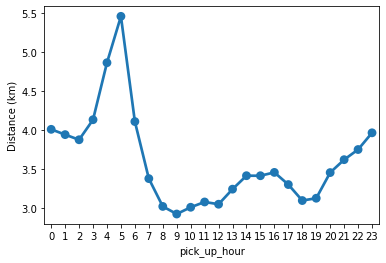

In [54]:
group5 = data.groupby('pick_up_hour').Distance.mean()
sns.pointplot(group5.index, group5.values)
plt.ylabel('Distance (km)')
plt.show()

### Observation

- Trip distance is highest during early morning hours which can account for some things like:

        1) Outstation trips taken during the weekends.

        2) Longer trips towards the city airport which is located in the outskirts of the city.

- Trip distance is fairly equal from morning till the evening varying around 3 - 3.5 kms.

- It starts increasing gradually towards the late night hours starting from evening till 5 AM and decrease steeply towards morning.

### Distance per weekday

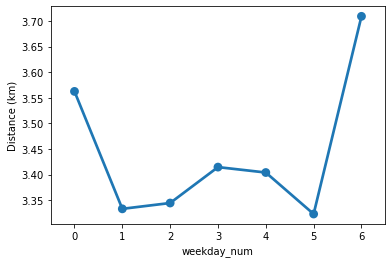

In [55]:
group6 = data.groupby('weekday_num').Distance.mean()
sns.pointplot(group6.index, group6.values)
plt.ylabel('Distance (km)')
plt.show()

### Observation

- Sunday to be in the top may be due to outstation trips or night trips towards the airport.

- Equal distribution with n average distance around 3.5 km/hr

### Distance per month

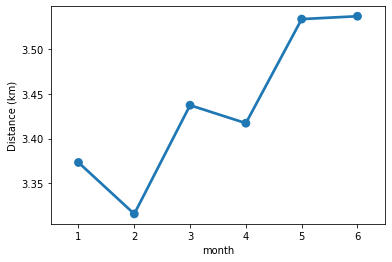

In [56]:
group7 = data.groupby('month').Distance.mean()
sns.pointplot(group7.index, group7.values)
plt.ylabel('Distance (km)')
plt.show()

### Observation

- The distibution is almost equivalent, varying mostly around 3.5 km/hr with 5th month being the highest in the average distance and 2nd month being the lowest.

### Distance per vendor

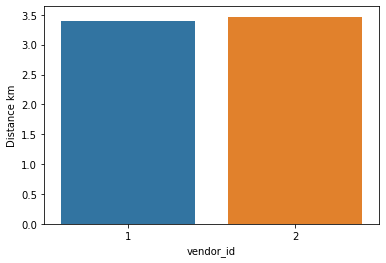

In [57]:
group8 = data.groupby('vendor_id').Distance.mean()
sns.barplot(group8.index, group8.values)
plt.ylabel("Distance km")
plt.show()

### Observation

- Both the vendores are in the same with respect to distance

### Distance Vs Flag

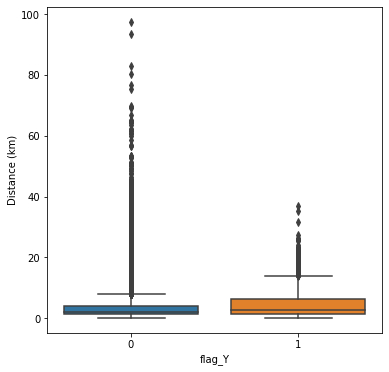

In [58]:
plt.figure(figsize = (6,6))
plot_dist = data.loc[(data.Distance < 100)]
sns.boxplot(x = "flag_Y", y = "Distance", data = plot_dist)
plt.ylabel('Distance (km)')
plt.show()

### Observation

- Interquartile range of distance is almost twice for Flag 'Y' trips as compared to the Flag 'N' trips

- Median value is much different in both the case as well.

- The range of distance and trip duration for the Flag 'Y' trips is much more limited and confined as compared with the flag 'N' trips and this also resulted in much less number of outliers for Flag 'Y' trips.

### Distance Vs. Trip duration

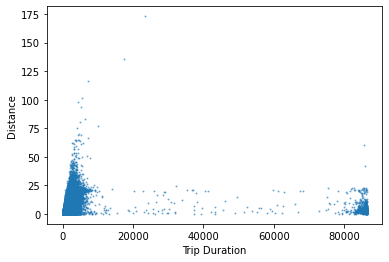

In [59]:
plt.scatter(data.trip_duration, data.Distance , s=1, alpha=0.5)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.show()

### Observation

- There are lots of trips which covered negligible distance but clocked more than 20,000 seconds in terms of the Duration.

- Initially there is some proper correlation between the distance covered and the trip duration in the graph. but later on it all seems uncorrelated.

- There were few trips which covered huge distance of approx 200 kms within very less time frame, which is unlikely and should be treated as outliers.

#### Graph area where distance is < 50 km and duration is < 1000 seconds


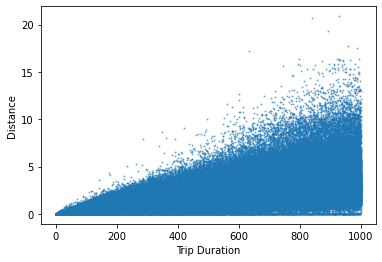

In [60]:
dur_dist = data.loc[(data.Distance < 50) & (data.trip_duration < 1000), ['Distance','trip_duration']]
plt.scatter(dur_dist.trip_duration, dur_dist.Distance , s=1, alpha=0.5)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.show()

### Observation

- There should have been a linear relationship between the distance covered and trip duration on an average but we can see dense collection of the trips in the lower right corner which showcase many trips with the inconsistent readings.

### Idea:

- Remove those trips which covered 0 km distance but clocked more than 1 minute to make our data more consistent for predictive model. Because if the trip was cancelled after booking, than that should not have taken more than a minute time. This is our assumption.

In [61]:
data = data[~((data.Distance == 0) & (data.trip_duration >= 60))]

### Observation

- Now, Instead of looking at each and every trip, we should approximate and try to filter those trips which covered less than 1 km distance and but clocked more than an hour.

In [62]:
duo = data.loc[(data['Distance'] <= 1) & (data['trip_duration'] >= 3600),['Distance','trip_duration']].reset_index(drop=True)

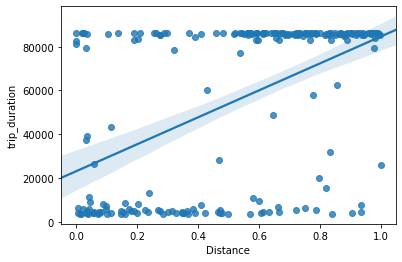

In [63]:
sns.regplot(duo.Distance, duo.trip_duration)
plt.show()

### Observations:

- Though the straight line tries to show some linear relation between the two. But there seems to be negligible correlation between these two metric as seen from the scatter plot where it should have been a linear distribution.

- It is rarely occurs that customer keep sitting in the taxi for more than an hour and it does not travel for even 1 km.

#### These should be removed to bring in more consistency to our results.

In [64]:
data = data[~((data['Distance'] <= 1) & (data['trip_duration'] >= 3600))]

### Average speed per hour

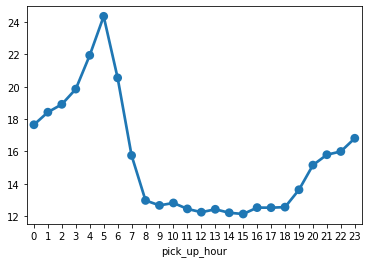

In [65]:
group9 = data.groupby('pick_up_hour').speed.mean()
sns.pointplot(group9.index, group9.values)
plt.show()

### Observation

- The average trend is totally inline with the normal circumstances.

- Average speed tend to increase after late evening and continues to increase gradually till the late early morning hours.

- Average taxi speed is highest at 5 AM in the morning, then it declines steeply as the office hours approaches.

- Average taxi speed is more or less same during the office hours i.e. from 8 AM till 6PM in the evening.

### Average speed per weekday

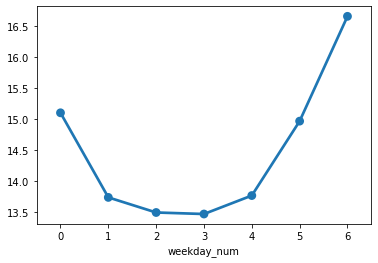

In [66]:
group10 = data.groupby('weekday_num').speed.mean()
sns.pointplot(group10.index, group10.values)
plt.show()

### Observations

- Average taxi speed is higher on weekend as compared to the weekdays which is obvious when there is mostly rush of office goers and business owners.

- Even on monday the average taxi speed is shown higher which is quite surprising when it is one of the most busiest day after the weekend. There can be several possibility for such behaviour
        1) Lot of customers who come back from outstation in early hours of Monday before 6 AM to attend office on time.
        2) Early morning hours customers who come from the airports after vacation to attend office/business on time for the coming week.

- There could be some more reasons as well which only a local must be aware of.

### Passenger count per vendor

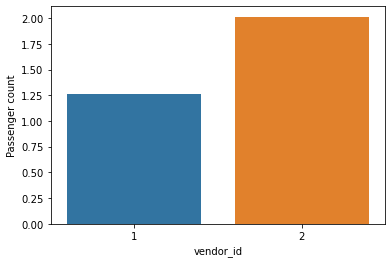

In [67]:
group9 = data.groupby('vendor_id').passenger_count.mean()
sns.barplot(group9.index, group9.values)
plt.ylabel('Passenger count')
plt.show()

### Observation

- Vendor 2 trips generally consist of 2 passengers as compared to the vendor 1 with 1 passenger.

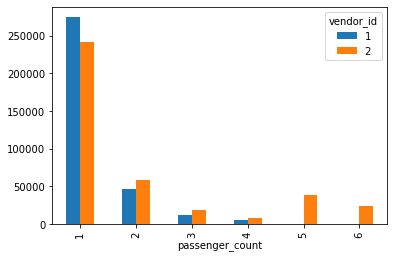

In [68]:
data.groupby('passenger_count').vendor_id.value_counts().reset_index(name='count').pivot("passenger_count","vendor_id","count").plot(kind='bar')
plt.show()

### Observation

- Most of the big cars are served by the Vendor 2 including minivans because other than passenger 1, vendor 2 has majority in serving more than 1 passenger count and that explains it greater share of the market.

### Map Visualization

- Visualize the Taxi pickup locations by placing longitude and latitude marker on the MAP of the US. So that we can analyze below questions:

- Are all pickups constrained to NYC and it's surrounding areas?

- Is there any unusual location of the pickup?

- Are the latitude longitude constrained to the land area of the US and nowhere else?

In [69]:
def map_marker(set):
    
    from mpl_toolkits.basemap import Basemap
    plt.figure(figsize = (20,20))

    lat_min = data["pickup_latitude"].min() - .2
    lat_max = data["pickup_latitude"].max() + .2
    lon_min = data["pickup_longitude"].min() - .2
    lon_max = data["pickup_longitude"].max() + .2

    
    cent_lat = (lat_min + lat_max) / 2
    cent_lon = (lon_min + lon_max) / 2

    
    map = Basemap(llcrnrlon=lon_min,
                  llcrnrlat=lat_min,
                  urcrnrlon=lon_max,
                  urcrnrlat=lat_max,
                  resolution='l',
                  projection='tmerc',
                  lat_0 = cent_lat,
                  lon_0 = cent_lon)

    
    map.drawmapboundary()
    map.drawcoastlines()
    map.fillcontinents()
    map.drawcountries(linewidth=2)
    map.drawstates()


    
    long = np.array(data["pickup_longitude"])
    lat = np.array(data["pickup_latitude"])

    x, y = map(long, lat)
    map.plot(x, y,'ro', markersize=2, alpha=1)

    plt.show()

### Taxi pickup location


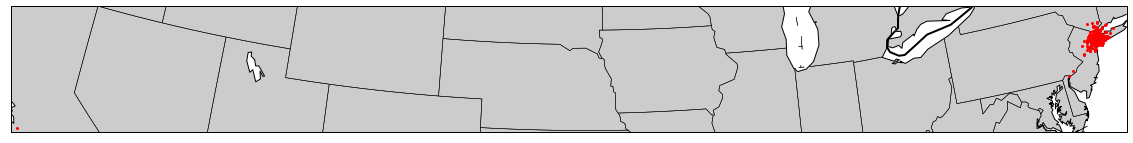

In [70]:
map_marker(data)

### Observation

- One unusual pickup from the CA state.

- There are quite a few pickup from the neighbouring state as well. Some are quite far and some very near to the NYC state

#### CA state pickup


In [71]:
data[data.pickup_longitude == data.pickup_longitude.min()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour_22,pickup_hour_23,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_9
421819,id2854272,2,2016-02-26 13:50:19,2016-02-26 13:58:38,2,-121.933342,37.389381,-121.933304,37.389511,N,...,0,0,0,1,0,0,0,0,0,0


### Observation
- The trip duration is approx 8 minutes still the distance travelled is just in few meters.

- Moreover the Latitude and Longitude readings are same.

- These are the outliers and should be removed for the consistency of the model

In [72]:
data = data[data.pickup_longitude != data.pickup_longitude.min()]

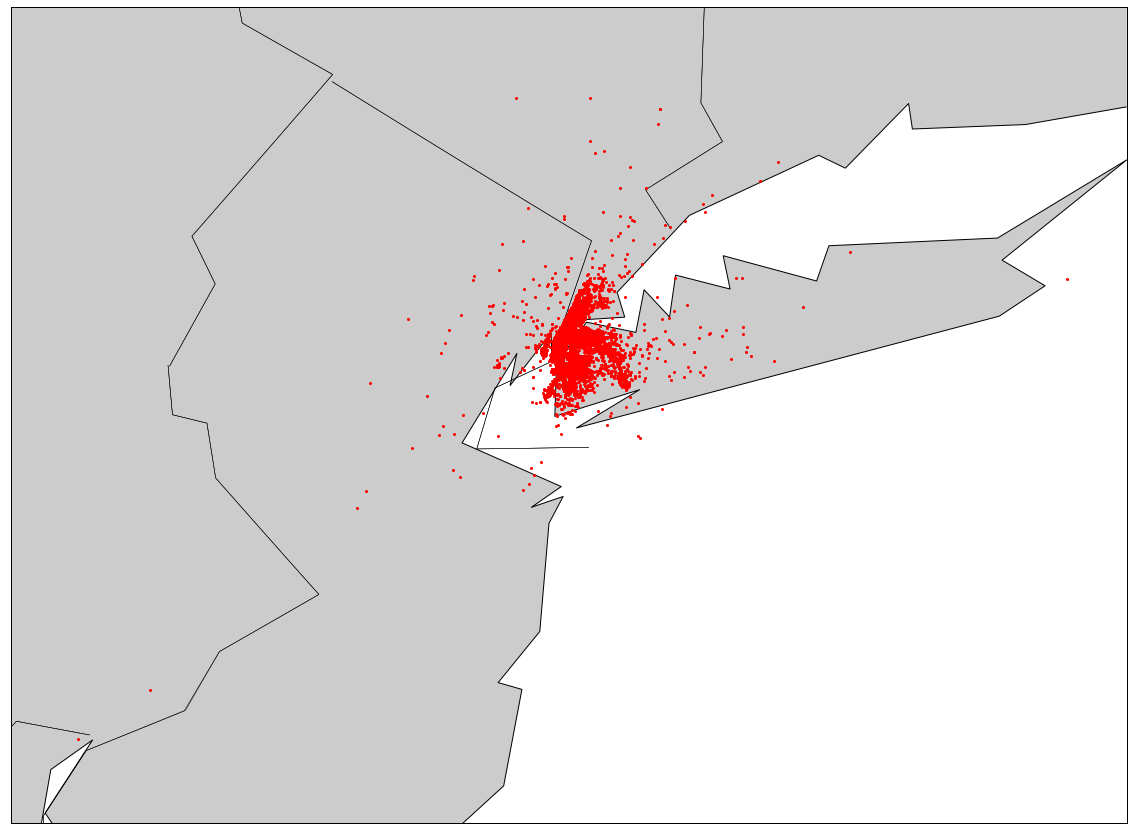

In [73]:
map_marker(data)

### Observation

- There are quite a few pickups being shown off the NYC coast i.e. in the Atlantic ocean.

- Most of the pickups are being shown in and around NYC area.

### NYC pickup locations

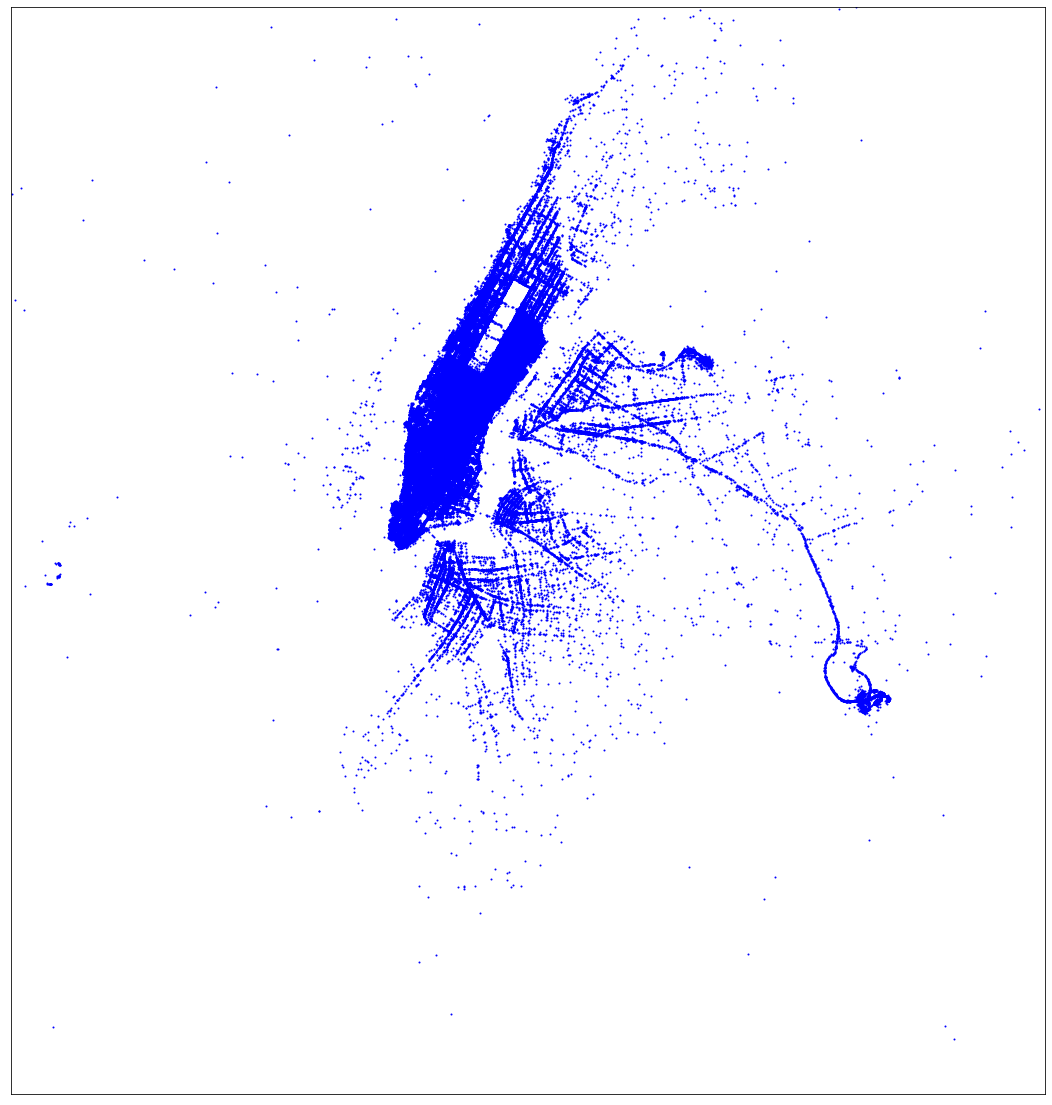

In [74]:
plt.figure(figsize=(20,20))
from mpl_toolkits.basemap import Basemap

lat_min = 40.5
lat_max = 40.9
lon_min = -74.2
lon_max = -73.7

cent_lat = (lat_min + lat_max) / 2
cent_lon = (lon_min + lon_max) / 2

map = Basemap(llcrnrlon=lon_min,
              llcrnrlat=lat_min,
              urcrnrlon=lon_max,
              urcrnrlat=lat_max,
              resolution='l',
              projection='tmerc',
              lat_0 = cent_lat,
              lon_0 = cent_lon)

long = np.array(data["pickup_longitude"])
lat = np.array(data["pickup_latitude"])

x, y = map(long, lat)
map.plot(x, y,'bo', markersize=1, alpha=1)
plt.xticks()
plt.show()

### Observations

- Most of the taxi pickups were done in the manhattan area as compared to the other areas in NYC.
- A long trail towards the airport shows that the airport is situated quite far from the Manhattan area.
- There must have been some long distance rides towards and from the airport.
- Similarly the average duration for the rides picked-up to or for the airport would have been longer.

### NYC drop off location

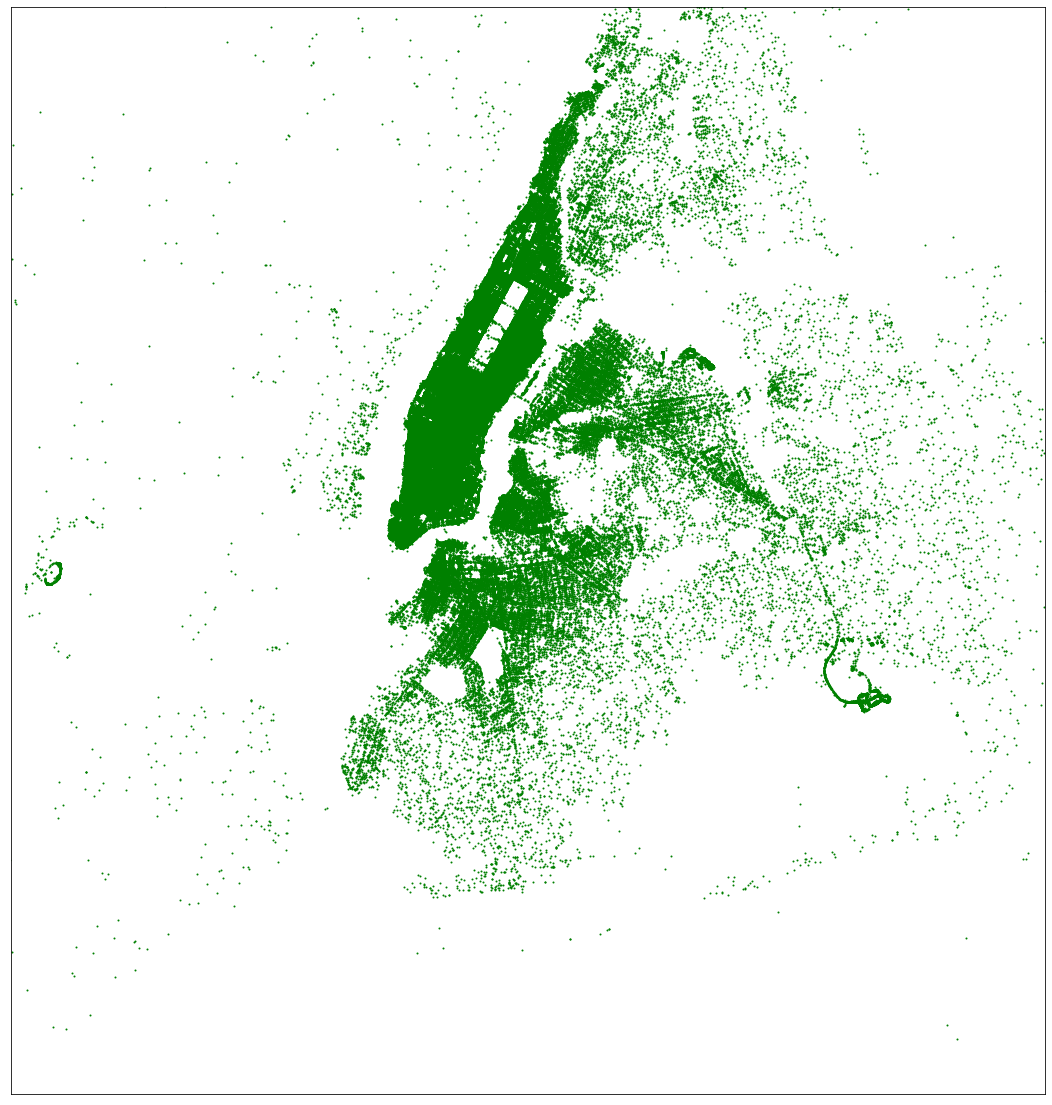

In [75]:
plt.figure(figsize=(20,20))

lat_min = 40.5
lat_max = 40.9
lon_min = -74.2
lon_max = -73.7

cent_lat = (lat_min + lat_max) / 2
cent_lon = (lon_min + lon_max) / 2

map = Basemap(llcrnrlon=lon_min,
              llcrnrlat=lat_min,
              urcrnrlon=lon_max,
              urcrnrlat=lat_max,
              resolution='l',
              projection='tmerc',
              lat_0 = cent_lat,
              lon_0 = cent_lon)

long = np.array(data["dropoff_longitude"])
lat = np.array(data["dropoff_latitude"])

x, y = map(long, lat)
map.plot(x, y,'go', markersize=1, alpha=1)
plt.xticks()
plt.show()

### Observation

- Dropoff's are much more distributed around the NYC area where still most of the dropoff's were done in the Manhattan.

### Question:

- Does that mean there were more dropoff's than the pickup's?

### Idea:

- Though the dropoffs seems to be larger in number than the pickups. But for each pickup we have a associated dropoffs in the dataset. It's just that the pickups were majorly concentrated in the Manhattan area.

In [76]:
data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour_22,pickup_hour_23,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_9
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,0,0,1,0,0,0,0,0,0,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,0,1,0,1,0,0,0,0,0,0
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,0,0,0,1,0,0,0,0,0,0
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,0,0,0,0,0,0,0,1,0,0
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,...,0,0,0,1,0,0,0,0,0,0
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,...,0,0,1,0,0,0,0,0,0,0
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,...,0,0,1,0,0,0,0,0,0,0
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,...,0,0,1,0,0,0,0,0,0,0


In [77]:
data['vendor_id_2'].unique()

array([1, 0], dtype=uint8)

In [78]:
list(zip( range(0,len(data.columns)),data.columns))

[(0, 'id'),
 (1, 'vendor_id'),
 (2, 'pickup_datetime'),
 (3, 'dropoff_datetime'),
 (4, 'passenger_count'),
 (5, 'pickup_longitude'),
 (6, 'pickup_latitude'),
 (7, 'dropoff_longitude'),
 (8, 'dropoff_latitude'),
 (9, 'store_and_fwd_flag'),
 (10, 'trip_duration'),
 (11, 'weekday'),
 (12, 'month'),
 (13, 'weekday_num'),
 (14, 'pick_up_hour'),
 (15, 'Distance'),
 (16, 'speed'),
 (17, 'flag_Y'),
 (18, 'vendor_id_2'),
 (19, 'month_2'),
 (20, 'month_3'),
 (21, 'month_4'),
 (22, 'month_5'),
 (23, 'month_6'),
 (24, 'weekday_num_1'),
 (25, 'weekday_num_2'),
 (26, 'weekday_num_3'),
 (27, 'weekday_num_4'),
 (28, 'weekday_num_5'),
 (29, 'weekday_num_6'),
 (30, 'pickup_hour_1'),
 (31, 'pickup_hour_2'),
 (32, 'pickup_hour_3'),
 (33, 'pickup_hour_4'),
 (34, 'pickup_hour_5'),
 (35, 'pickup_hour_6'),
 (36, 'pickup_hour_7'),
 (37, 'pickup_hour_8'),
 (38, 'pickup_hour_9'),
 (39, 'pickup_hour_10'),
 (40, 'pickup_hour_11'),
 (41, 'pickup_hour_12'),
 (42, 'pickup_hour_13'),
 (43, 'pickup_hour_14'),
 (44, 'pi

### Creating Benchmark model

In [79]:
from sklearn.utils import shuffle

data = shuffle(data, random_state = 42)

div = int(data.shape[0]/4)

train = data.loc[:3*div+1,:]
test = data.loc[3*div+1:]

In [80]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour_22,pickup_hour_23,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_9
128974,id0192028,1,2016-01-25 21:24:25,2016-01-25 21:40:20,1,-74.009605,40.715126,-73.987381,40.739616,N,...,0,0,1,0,0,0,0,0,0,0
45334,id3265312,2,2016-01-15 06:36:08,2016-01-15 06:45:36,1,-73.985847,40.763874,-73.952675,40.789043,N,...,0,0,1,0,0,0,0,0,0,0
321158,id0237424,2,2016-01-03 02:05:35,2016-01-03 02:19:08,5,-74.002525,40.749935,-73.996269,40.720226,N,...,0,0,0,0,0,0,1,0,0,0
202673,id0489855,1,2016-02-19 23:04:44,2016-02-19 23:11:22,1,-74.003922,40.737373,-74.006622,40.744141,N,...,0,1,1,0,0,0,0,0,0,0
408616,id3975782,1,2016-06-13 06:32:39,2016-06-13 06:35:05,1,-73.990120,40.757122,-73.979187,40.756207,N,...,0,0,1,0,0,0,0,0,0,0


In [81]:
test.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour_22,pickup_hour_23,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_9
545197,id0001618,2,2016-04-05 22:58:14,2016-04-05 23:07:08,1,-73.989052,40.721561,-74.005669,40.709179,N,...,1,0,1,0,0,0,0,0,0,0
477367,id1076081,1,2016-02-20 19:28:55,2016-02-20 20:12:09,1,-73.993111,40.727898,-73.933746,40.846863,N,...,0,0,1,0,0,0,0,0,0,0
490112,id2622397,2,2016-04-18 22:56:56,2016-04-18 23:01:19,1,-73.987152,40.756119,-73.978630,40.759521,N,...,1,0,1,0,0,0,0,0,0,0
632259,id0083884,1,2016-03-23 18:29:03,2016-03-23 18:36:27,2,-73.959091,40.709164,-73.963051,40.719185,N,...,0,0,0,1,0,0,0,0,0,0
259210,id3305446,1,2016-06-28 19:41:57,2016-06-28 20:00:53,2,-73.995300,40.717667,-73.983711,40.756245,N,...,0,0,0,1,0,0,0,0,0,0


### Simple mean(Mean of Trip duration)

In [82]:
test['simple_mean'] = train['trip_duration'].mean()

In [83]:
from sklearn.metrics import mean_squared_error as mse

simple_mean_squared_error = np.sqrt(mse(test['vendor_id'] , test['simple_mean']))
simple_mean_squared_error

925.5461965813723

In [84]:
simple_mean_squared_error = np.sqrt(mse(test['passenger_count'] , test['simple_mean']))
simple_mean_squared_error

925.4194705751834

In [85]:
simple_mean_squared_error = np.sqrt(mse(test['Distance'] , test['simple_mean']))
simple_mean_squared_error

923.6342580520067

In [86]:
simple_mean_squared_error = np.sqrt(mse(test['speed'] , test['simple_mean']))
simple_mean_squared_error

912.6946471447654

### Mean trip duration with respect to passenger_count

In [87]:
out_type = pd.pivot_table(train, values='trip_duration', index = ['passenger_count'], aggfunc=np.mean)
out_type

,trip_duration
passenger_count,
1,895.529689
2,987.054239
3,1027.874453
4,1007.166781
5,1020.668969
6,1025.422071


In [88]:
test['pc_mean'] = 0

for i in train['passenger_count'].unique():
    test['pc_mean'][test['passenger_count'] == str(i)] = train['trip_duration'][train['passenger_count'] == str(i)].mean()

#### calculating root mean squared error


In [89]:
out_type_error = np.sqrt(mse(test['trip_duration'] , test['pc_mean'] ))
out_type_error

3076.030083379951

### Mean trip duration with respect to vendor_id

In [90]:
out_type = pd.pivot_table(train, values='trip_duration', index = ['vendor_id'], aggfunc=np.mean)
out_type

,trip_duration
vendor_id,
1,826.228271
2,1014.917320


In [91]:
test['vid_mean'] = 0

for i in train['vendor_id'].unique():
    test['vid_mean'][test['vendor_id'] == str(i)] = train['trip_duration'][train['vendor_id'] == str(i)].mean()

#### calculating root mean squared error


In [92]:
out_type_error = np.sqrt(mse(test['trip_duration'] , test['vid_mean'] ))
out_type_error

3076.030083379951

### Mean trip duration with respect to weekday

In [93]:
out_type = pd.pivot_table(train, values='trip_duration', index = ['weekday'], aggfunc=np.mean)
out_type

,trip_duration
weekday,
Friday,964.447934
Monday,858.861128
Saturday,893.315898
Sunday,896.699168
Thursday,975.070615
Tuesday,927.957861
Wednesday,961.103568


In [94]:
test['weekday_mean'] = 0

for i in train['weekday'].unique():
    test['weekday_mean'][test['weekday'] == str(i)] = train['trip_duration'][train['weekday'] == str(i)].mean()

#### calculating root mean squared error


In [95]:
out_type_error = np.sqrt(mse(test['trip_duration'] , test['weekday_mean'] ))
out_type_error

2929.6901214074487

### Mean trip duration with respect to store and forward flag

In [96]:
out_type = pd.pivot_table(train, values='trip_duration', index = ['store_and_fwd_flag'], aggfunc=np.mean)
out_type

,trip_duration
store_and_fwd_flag,
N,926.220358
Y,1079.681853


In [97]:
test['sf_mean'] = 0

for i in train['store_and_fwd_flag'].unique():
    test['sf_mean'][test['store_and_fwd_flag'] == str(i)] = train['trip_duration'][train['store_and_fwd_flag'] == str(i)].mean()

#### calculating root mean squared error


In [98]:
out_type_error = np.sqrt(mse(test['trip_duration'] , test['sf_mean'] ))
out_type_error

2929.9902949286056

### Mean trip duration with respect to month

In [99]:
out_type = pd.pivot_table(train, values='trip_duration', index = ['month'], aggfunc=np.mean)
out_type

,trip_duration
month,
1,892.200560
2,889.693945
3,897.695070
4,945.995096
5,970.045297
6,965.979263


In [100]:
test['month_mean'] = 0

for i in train['month'].unique():
    test['month_mean'][test['month'] == str(i)] = train['trip_duration'][train['month'] == str(i)].mean()

#### calculating root mean squared error


In [101]:
out_type_error = np.sqrt(mse(test['trip_duration'] , test['month_mean'] ))
out_type_error

3076.030083379951

### Mean trip_duration with respect to both vendor_id and passenger_count

In [102]:
combo = pd.pivot_table(train, values = 'trip_duration', index = ['vendor_id','passenger_count'], aggfunc = np.mean)
combo

trip_duration
vendor_id passenger_count               
1         1                   801.184459
          2                   928.335185
          3                   941.943985
          4                   992.639560
          5                   729.444444
          6                  1157.869565
2         1                  1003.377783
          2                  1032.407864
          3                  1082.023648
          4                  1017.458544
          5                  1022.167429
          6                  1025.022557

In [103]:
test['Super_mean'] = 0

s2 = 'vendor_id'
s1 = 'passenger_count'

for i in test[s1].unique():
    for j in test[s2].unique():
        test['Super_mean'][(test[s1] == i) & (test[s2]==str(j))] = train['trip_duration'][(train[s1] == i) & (train[s2]==str(j))].mean()

#### calculating root mean squared error


In [104]:
super_mean_squared_error = np.sqrt(mse(test['trip_duration'] , test['Super_mean'] ))
super_mean_squared_error

3076.030083379951

### Mean trip_duration with respect to both weekday and store and forward flag

In [105]:
combo = pd.pivot_table(train, values = 'trip_duration', index = ['weekday','store_and_fwd_flag'], aggfunc = np.mean)
combo

trip_duration
weekday   store_and_fwd_flag               
Friday    N                      963.296795
          Y                     1154.807512
Monday    N                      857.405713
          Y                     1111.829412
Saturday  N                      893.502314
          Y                      853.533742
Sunday    N                      896.497868
          Y                      934.870370
Thursday  N                      973.458200
          Y                     1246.794118
Tuesday   N                      927.067631
          Y                     1081.572973
Wednesday N                      960.261480
          Y                     1101.974747

In [106]:
test['Super_mean'] = 0
s2 = 'weekday'
s1 = 'store_and_fwd_flag'

for i in test[s1].unique():
    for j in test[s2].unique():
        test['Super_mean'][((test[s1] == str(i)) & (test[s2]==str(j)))] = train['trip_duration'][(train[s1] == str(i)) & (train[s2]==str(j))].mean()

#### calculating root mean squared error


In [107]:
super_mean_squared_error = np.sqrt(mse(test['trip_duration'] , test['Super_mean'] ))
super_mean_squared_error

2929.664784026928

### Mean trip_duration with respect to both weekday and month

In [108]:
combo = pd.pivot_table(train, values = 'trip_duration', index = ['weekday','month'], aggfunc = np.mean)
combo

trip_duration
weekday   month               
Friday    1         920.578811
          2         908.180140
          3         886.245230
          4        1024.302175
          5        1036.493422
          6        1010.064229
Monday    1         842.743100
          2         880.982032
          3         832.726255
          4         823.643323
          5         896.371409
          6         862.428828
Saturday  1         873.565194
          2         840.543251
          3         823.821033
          4         928.823456
          5         892.395547
          6         999.799847
Sunday    1         901.544301
          2         884.134039
          3         921.731936
          4         898.260967
          5         877.009423
          6         902.123693
Thursday  1         887.360187
          2         916.590473
          3         962.810317
          4         994.794881
          5        1076.014466
          6        1007.850000
Tuesday   1         955.030612
          2         875.893162
          3         887.527432
          4         927.173452
          5         986.239348
          6         933.111341
Wednesday 1         853.885901
          2         922.316157
          3         945.552758
          4         986.426429
          5        1044.123906
          6        1004.040353

In [109]:
test['Super_mean'] = 0
s2 = 'weekday'
s1 = 'month'

for i in test[s1].unique():
    for j in test[s2].unique():
        test['Super_mean'][(test[s1] == i) & (test[s2]==str(j))] = train['trip_duration'][(train[s1] == i) & (train[s2]==str(j))].mean()

#### calculating mean absolute error


In [110]:
super_mean_squared_error = np.sqrt(mse(test['trip_duration'] , test['Super_mean'] ))
super_mean_squared_error

2929.471119515208

#### Segregating dependent and independent variable

In [111]:
y = data.iloc[:,10]
X = data.iloc[:,range(15,60)]
X.shape, y.shape

((726928, 45), (726928,))

#### Idea:

* Duration variable assigned to Y because that is the dependent variable.
* Features such as id, timestamp and weekday were not assigned to X array because they are of type object. And we need an array of float data type.

### Modelling

### Multiple Linear Regression

#### Model Training

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=56)

In [113]:
regressor = LinearRegression() 
regressor.fit(X_train,y_train) 

LinearRegression()

#### Model Predictions

In [114]:
y_pred = regressor.predict(X_test) 

#### Model evaluation
We will evaluate our model's accuracy through two suggested metrics for the regression models. i.e. RMSE and variance score. Where RMSE of 0 and variance of 1 is considered as the best score for a prediction model.

In [115]:
print('RMSE score for the Multiple LR is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
print('Variance score for the Multiple LR is : %.2f' % regressor.score(X_test, y_test))
print("\n")

RMSE score for the Multiple LR is : 2686.2099778243733
Variance score for the Multiple LR is : 0.07




### Observations
* Very poor Root mean squared value.
* And the low variance score which is also bad.


### Lasso Regularization

In [116]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.5)

In [117]:
lasso = Lasso(alpha=1.5)
lasso.fit(X_train,y_train)

Lasso(alpha=1.5)

#### Model Predictions

In [118]:
y_pred_lasso = lasso.predict(X_test) 

#### Model Evaluation

In [119]:
print('RMSE score for the Lasso Regression is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred_lasso))))
print('Variance score for the Lasso Regression is : %.2f' % lasso.score(X_test, y_test))
print("\n")

RMSE score for the Lasso Regression is : 2686.3901377863476
Variance score for the Lasso Regression is : 0.07




### Observation:
* Linear Regression with regularization also gives the same result 

Let's find the solution

In [120]:
X_train.shape

(545196, 45)

#### Linear correlation of each feature with the target variable


In [121]:
from scipy.stats import pearsonr
df1 = pd.DataFrame(np.concatenate((X_train,y_train.values.reshape(len(y_train),1)),axis=1))
df1.columns = df1.columns.astype(str)

features = df1.iloc[:,:45].columns.tolist()
target = df1.iloc[:,45].name

correlations = {}
for f in features:
    data_temp = df1[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]
    
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
0 vs 45,0.183363
1 vs 45,-0.047699
3 vs 45,0.033454
38 vs 45,-0.016628
30 vs 45,0.012806
20 vs 45,-0.011687
29 vs 45,0.011529
42 vs 45,0.010868
28 vs 45,0.009694
11 vs 45,0.009582


### Observations¶
* None of the feature is linearly correlated with the target variable "45". That is why it is not a good model for the prediction of the trip duration.

### KNN Model

In [122]:
y = data.iloc[:,10]
X = data.iloc[:,range(15,60)]
X.shape, y.shape

((726928, 45), (726928,))

In [123]:
X.shape, y.shape

((726928, 45), (726928,))

#### Importing MinMax Scaler


In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [125]:
X = pd.DataFrame(X_scaled)

In [126]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.019101,0.122096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.022852,0.245603,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.019334,0.145168,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.004543,0.069686,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.005354,0.223879,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Importing Train test split


In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 56)

In [128]:
from sklearn.neighbors import KNeighborsRegressor as KNN

#### Creating instance of KNN

In [129]:
reg = KNN(n_neighbors = 2)

#### Fitting the model

In [130]:
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

#### Predicting over the Train Set and calculating root mean squared log error and variance score

In [131]:
y_pred_KNN = reg.predict(X_test)

print('RMSE score for the KNN is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred_KNN))))
print('Variance score for the KNN is : %.2f' % reg.score(X_test, y_test))
print("\n")

RMSE score for the KNN is : 2708.4652245101393
Variance score for the KNN is : 0.05




### Random Forest Regressor

#### Model Training

#### Create instance of Random forest

In [132]:
regressor_rfraw = RandomForestRegressor(n_jobs=-1)

#### Fitting the model

In [133]:
regressor_rfraw.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

#### Model Prediction

In [134]:
y_pred_rfraw = regressor_rfraw.predict(X_test)

#### Model Evaluation

In [135]:
print('RMSE score for the RF regressor is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred_rfraw))))
print('RMSLE score for the RF regressor is : {}'.format(np.sqrt(metrics.mean_squared_log_error(y_test,y_pred_rfraw))))
print('Variance score for the RF regressor is : %.2f' % regressor_rfraw.score(X_test, y_test))

RMSE score for the RF regressor is : 94.94325945795734
RMSLE score for the RF regressor is : 0.031724547422723876
Variance score for the RF regressor is : 1.00


#### Interesting find
* There is approx 200% improvement on the RMSE score for the Random forest regressor over the Linear regressor.
* Even the variance score is approx 1 which is a good score.


### XGBoost Regressor

#### Model training

#### Create instance of XGBoost Regressor

In [136]:
regressor_xgbraw = XGBRegressor(n_jobs=-1)

#### Fitting the model

In [137]:
regressor_xgbraw.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

#### Model Prediction

In [138]:
y_pred_xgbraw = regressor_xgbraw.predict(X_test)

#### Model Evaluation

In [139]:
print('RMSE score for the XGBoost regressor is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred_xgbraw))))
print('Variance score for the XGBoost regressor is : %.2f' % regressor_xgbraw.score(X_test, y_test))

RMSE score for the XGBoost regressor is : 145.13960553222913
Variance score for the XGBoost regressor is : 1.00


### Observations
* There is a significant improvement in the RMSE score for the tuned XGBoost regressor over the Random forest regressor when trained on the given features.


#### Comparing test results for the XGBoost and RF regressor


In [140]:
print("Total sum of difference between the actual and the predicted values for the RF regressor is : %d"%np.abs(np.sum(np.subtract(y_test,y_pred_rfraw))))
print("Total sum of difference between the actual and the predicted values for the tuned XGB regressor is : %d"%np.abs(np.sum(np.subtract(y_test,y_pred_xgbraw))))

Total sum of difference between the actual and the predicted values for the RF regressor is : 112305
Total sum of difference between the actual and the predicted values for the tuned XGB regressor is : 88273


### Averaging

In [141]:
from statistics import mean
final_pred = np.array([])
for i in range(0,len(X_test)):
    final_pred = np.append(final_pred, np.mean([y_pred_lasso[i],y_pred_rfraw[i],y_pred_xgbraw[i],y_pred_KNN[i]]))

In [142]:
from sklearn.metrics import r2_score
r2_score(y_test, final_pred)

0.7738766410788914

In [143]:
r2_score(y_test, y_pred_lasso), r2_score(y_test,y_pred_rfraw), r2_score(y_test, y_pred_xgbraw), r2_score(y_test, y_pred_KNN)

(0.06919759159294825,
 0.9988373537265591,
 0.9972829901912323,
 0.05383722596395535)

### Weighted Averaging

In [144]:
from statistics import mean
final_pred = np.array([])
for i in range(0,len(X_test)):
    final_pred = np.append(final_pred, np.mean([y_pred_lasso[i], y_pred_KNN[i], y_pred_rfraw[i],y_pred_rfraw[i],y_pred_xgbraw[i],y_pred_xgbraw[i]]))

In [145]:
r2_score(y_test, final_pred)

0.8981685556315506

In [146]:
r2_score(y_test, y_pred_lasso), r2_score(y_test,y_pred_rfraw), r2_score(y_test, y_pred_xgbraw), r2_score(y_test, y_pred_KNN)

(0.06919759159294825,
 0.9988373537265591,
 0.9972829901912323,
 0.05383722596395535)

###  Rank averaging

In [147]:
m1_score= lasso.score(X_test, y_test)
m2_score= reg.score(X_test,y_test)
m3_score= regressor_rfraw.score(X_test, y_test)
m4_score= regressor_xgbraw.score(X_test, y_test)

m1_score, m2_score, m3_score, m4_score

(-0.024331240775971263,
 0.05383722596395535,
 0.9988373537265591,
 0.9972829901912323)

In [148]:
index_ = [1,2,3,4]
valid_r2 = [m1_score,m2_score,m3_score,m4_score]

rank_eval = pd.DataFrame({
    'score':valid_r2
}, index = index_)
rank_eval

,score
1,-0.024331
2,0.053837
3,0.998837
4,0.997283


In [149]:
sorted_rank = rank_eval.sort_values('score')
sorted_rank

,score
1,-0.024331
2,0.053837
4,0.997283
3,0.998837


In [150]:
sorted_rank['rank'] = [i for i in range(1,5)]
sorted_rank

,score,rank
1,-0.024331,1
2,0.053837,2
4,0.997283,3
3,0.998837,4


In [151]:
sorted_rank['weight'] = sorted_rank['rank']/sorted_rank['rank'].sum()
sorted_rank

,score,rank,weight
1,-0.024331,1,0.1
2,0.053837,2,0.2
4,0.997283,3,0.3
3,0.998837,4,0.4


In [152]:
wt_pred1 = y_pred_lasso * float(sorted_rank.loc[[1],['weight']].values)
wt_pred2 = y_pred_KNN * float(sorted_rank.loc[[2],['weight']].values)
wt_pred3 = y_pred_rfraw * float(sorted_rank.loc[[3],['weight']].values)
wt_pred4 = y_pred_xgbraw * float(sorted_rank.loc[[4],['weight']].values)
ranked_prediction = wt_pred1 + wt_pred2 + wt_pred3 + wt_pred4
ranked_prediction

array([ 517.05106882, 1254.47505352, 1619.71622265, ...,  173.43989475,
        953.23590537,  516.72151533])

In [153]:
r2_score(y_test, ranked_prediction)

0.9163963208953789

# Result:
* By using Averaging technique combined all the models linear regression with lasso regularization, KNN, Random forest, XGBoost regressor predicting the final predictions.
* In all the techniques, can see that random forest regressor and XGBoost regressor has scored 0.99 respectively.
* Performed averaging, weighted averaging, ranked averaging and obtained the predictions.
* The ranked averaging has scored 0.91, weighted averaging has scored 0.89 and averaging has scored 0.77.
* The ranked averaging performed better than other averaging techniques